## Import Libraries and packages

In [1]:
import numpy as np
import scipy
import scipy.fft
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io
import librosa
np.set_printoptions(threshold=100)

# Import Sound File from Library

In [2]:
file = librosa.load('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')
file

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8401162e-05,
        1.7894254e-04, 2.4782095e-04], dtype=float32), 22050)

In [3]:
sample_rate = file[1]
samples = file[0]
print(str(sample_rate) + " is the sample rate" + " , " + str(len(samples)) + " samples in file")

22050 is the sample rate , 136857 samples in file


## Play original sound 

In [70]:
# Play original file
from IPython.display import Audio
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')

In [71]:
# length of .wav file in seconds
duration = int(len(samples)/sample_rate)
print("input .wav file is about" + " " + str(duration) + " " + "seconds long")

input .wav file is about 6 seconds long


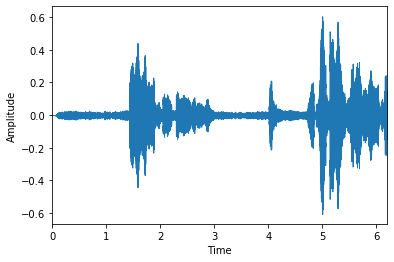

In [72]:
# plot soundwave
from librosa import display
plt.figure()
librosa.display.waveplot(y = samples, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Define functions

In [73]:
# define fft functions

def fft_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound)) # scipy fft algorithm 
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2])) #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()


def fft_50_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = scipy.fft.fft(sound)- 50 # -50
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2]), color = "Red") #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()

def fft_deep_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = np.log(scipy.fft.fft(sound)- 50) # -50, ln natural log(ln)transform with np.log 
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2]), color = "Red") #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()

def fft_array(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = scipy.fft.fft(sound)
    return y

def fft_array_deep(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = np.log(scipy.fft.fft(sound) - 50)
    return y

def fft_array_50(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = scipy.fft.fft(sound) - 50
    return y

In [56]:
longarray = fft_array(samples, sample_rate)
longarray[0:40] # first 40 elements
max(longarray)

(586.78064+133.67897j)

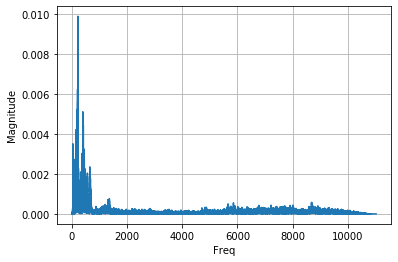

In [57]:
fft_plot(samples, sample_rate)

## Data and Graph of f(freq) - 50

In [58]:
long_array_50 = fft_array_50(samples, sample_rate)
long_array_50[:30]

array([-49.23783 -0.j        , -51.16527 +0.88283086j,
       -49.64174 -1.5857176j , -50.878567+0.8092307j ,
       -51.3628  +1.5586596j , -51.024284+0.7283529j ,
       -49.415474-1.2241337j , -52.3006  +1.1118681j ,
       -48.701595+0.5503695j , -51.773155-0.44656837j,
       -51.203754+1.5780263j , -50.66522 +0.32625052j,
       -51.69667 -1.5333097j , -50.261696-0.6092026j ,
       -50.301804+0.7114515j , -51.45147 -1.0164379j ,
       -50.272846+0.6583358j , -50.331215+0.8880477j ,
       -49.328033-1.1975565j , -50.284306+0.5501405j ,
       -50.810658+0.11726108j, -49.192005+0.6412027j ,
       -50.728233-0.35277557j, -51.14562 -1.3300402j ,
       -50.34655 -0.07980609j, -48.936363+0.33485615j,
       -49.66268 -0.09421086j, -51.35878 -0.30443406j,
       -50.36014 +0.803877j  , -49.430153-0.04435885j], dtype=complex64)

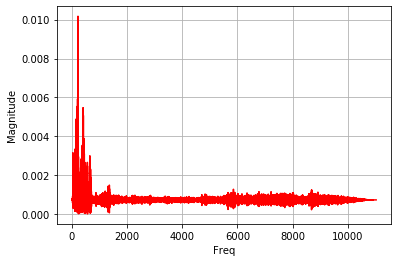

In [59]:
fft_50_plot(samples, sample_rate)

## Data and Graph of ln(f(freq) - 50)

In [75]:
long_array_deep = fft_array_deep(samples, sample_rate)
long_array_deep[:30]

array([3.8966622-3.1415925j, 3.9352098+3.1243398j, 3.9053419-3.1096604j,
       3.929568 +3.1256888j, 3.9393744+3.111256j , 3.9324036+3.127319j ,
       3.9005704-3.1168253j, 3.957234 +3.1203368j, 3.8857756+3.1302922j,
       3.946909 -3.1329675j, 3.9362876+3.1107838j, 3.9252603+3.1351533j,
       3.945833 -3.1119416j, 3.9173167-3.1294727j, 3.918141 +3.12745j  ,
       3.940834 -3.12184j  , 3.917551 +3.128498j , 3.918781 +3.1239505j,
       3.8987873-3.11732j  , 3.9177527+3.1306524j, 3.9281087+3.1392848j,
       3.895816 +3.1285586j, 3.9265068-3.1346385j, 3.935015 -3.1155934j,
       3.9189312-3.1400075j, 3.8905442+3.1347501j, 3.9052558-3.1396956j,
       3.9388535-3.1356652j, 3.9193273+3.1256313j, 3.900561 -3.1406953j],
      dtype=complex64)

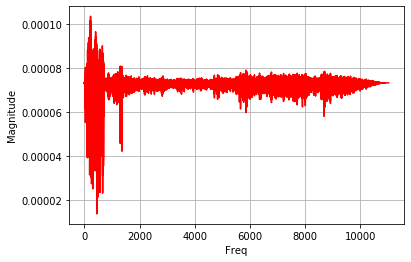

In [76]:
fft_deep_plot(samples, sample_rate)

In [77]:
from scipy import ifft
inverse_data_50 = scipy.fft.irfft(long_array_50)

In [78]:
inverse_data_50[:100]

array([-4.9999996e+01, -1.6777797e-06,  1.3504363e-06, -1.4199989e-06,
        1.3905681e-06, -1.3860915e-06,  1.3415207e-06, -1.3200560e-06,
        1.3656618e-06, -1.3834222e-06,  1.3067753e-06, -1.3495089e-06,
        1.2827247e-06, -1.3196029e-06,  1.2828625e-06, -1.2452539e-06,
        1.1821849e-06, -1.1051138e-06,  1.1412772e-06, -1.1469642e-06,
        1.0918724e-06, -1.2168648e-06,  1.1925865e-06, -1.0665447e-06,
        1.0597157e-06, -1.1100817e-06,  1.0616517e-06, -1.0979813e-06,
        1.0962158e-06, -9.5810310e-07,  1.0040521e-06, -9.4577615e-07,
        1.1449441e-06, -9.8482712e-07,  9.6671056e-07, -9.5252096e-07,
        9.2811035e-07, -9.2362569e-07,  9.0906627e-07, -9.0035041e-07,
        8.6946875e-07, -9.1580830e-07,  9.0166554e-07, -8.1049495e-07,
        8.7322303e-07, -8.4236490e-07,  8.2959025e-07, -8.4639333e-07,
        7.6216207e-07, -8.6547112e-07,  7.8673190e-07, -7.1166147e-07,
        7.2796081e-07, -7.1535516e-07,  7.5727320e-07, -7.2150925e-07,
      

In [79]:
from scipy import ifft
inverse_data = scipy.fft.irfft(long_array_deep)

In [80]:
inverse_data[:100]

array([ 3.93118954e+00,  3.59014258e-08,  1.60125475e-02,  3.14973292e-08,
        1.62707306e-02,  4.17540917e-08,  1.68541521e-02,  9.49902059e-08,
        2.15630382e-02, -6.31508385e-07,  1.75798759e-02, -1.04259482e-06,
        1.31738978e-02, -9.08749996e-07,  1.23881251e-02, -5.53017060e-07,
        1.71873420e-02, -1.43919272e-06,  1.89246815e-02, -3.64292941e-06,
        6.80575753e-03, -1.73475109e-06,  1.30072106e-02, -2.90942307e-06,
        1.34796742e-02, -4.76139985e-06,  7.42992153e-03, -4.78019956e-06,
        5.55202365e-03, -5.71528926e-06, -1.84937823e-03, -3.17344598e-06,
        2.08552787e-03, -2.87544322e-06,  6.82597421e-03, -4.94338883e-06,
        7.88816996e-03, -1.00220122e-05, -1.02736745e-02, -4.04575212e-06,
       -7.04014720e-03, -1.34667971e-06,  1.09586108e-03, -4.03983267e-06,
       -1.36907818e-03, -3.64576886e-06, -7.47268088e-04, -4.00586759e-06,
       -3.94718983e-04, -5.39394068e-06, -4.88199247e-03, -2.24606833e-06,
        3.26632347e-04, -

## Take Inverse to convert transformed frequencies back to .wav files

In [67]:
len(inverse_data_50)

273712

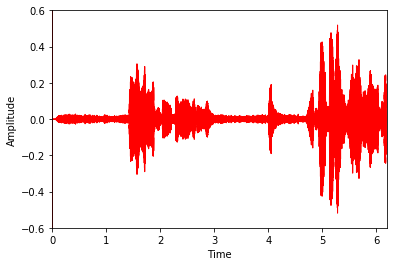

In [142]:
plt.figure()
librosa.display.waveplot(y = inverse_data_50, sr = (sample_rate*2), color = "red")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-.6, .6)
plt.show()

### Inverse data f(freq) - 50 converted to new_1.wav

In [143]:
from scipy.io.wavfile import write
write("new_1.wav", (sample_rate*2), inverse_data_50)

In [144]:
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/new_1.wav')

### Inverse data ln(f(freq) - 50) converted to new_2.wav

In [145]:
len(inverse_data)

273712

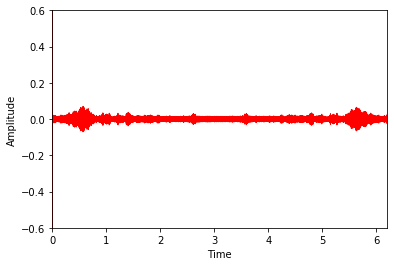

In [146]:
plt.figure()
librosa.display.waveplot(y = inverse_data, sr = (sample_rate*2), color = "red")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-.6, .6)
plt.show()

In [147]:
#inverse_data = [sample_rate, inverse_data]

In [148]:
from scipy.io.wavfile import write
write("new_2.wav", (sample_rate*2), inverse_data)

In [149]:
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/new_2.wav')

# Implementation of the DFT algorithm (From a 1D sound file)

In [150]:
x = np.asarray(samples, dtype=float)[:-1]
print(x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.43795283e-05
  2.84011621e-05  1.78942544e-04]


In [151]:
N = x.shape[0]
N

136856

In [152]:
n = np.arange(N)
n

array([     0,      1,      2, ..., 136853, 136854, 136855])

In [153]:
k = n.reshape((N, 1))
k

array([[     0],
       [     1],
       [     2],
       ...,
       [136853],
       [136854],
       [136855]])

In [154]:
#too long and computationally expensive to be run in a reasonable amount of time
#M = np.exp(-2j * np.pi * k * n / N)

In [155]:
np.log2(N)

17.062299160732607

In [156]:
# approximate to 17 (rounding down)
2**np.floor(np.log2(N))

131072.0

In [157]:
N - 2**np.floor(np.log2(N))

5784.0

# Make size a power of 2 

In [158]:
import sys
import numpy
#numpy.set_printoptions(threshold=100)


def forrier(N,k,n):
    return np.exp(-1j * 2 * np.pi * k * n / N)


def printArray(arr):
    for row in arr:
        for item in row:
            print("{:8.3f}".format(item), end = " ")
        print("")


In [159]:
np.printoptions(precision=2, suppress=True)
# Size must be a power of 2

x_new = np.asarray(x, dtype=float)[5784:]
with np.printoptions(precision=4, suppress=True,threshold=np.inf, linewidth=100):
    print(x_new[:500])

[-0.005  -0.0052 -0.0059 -0.0065 -0.0068 -0.007  -0.0071 -0.0076 -0.0085 -0.0097 -0.011  -0.0122
 -0.0131 -0.0141 -0.0149 -0.0156 -0.0161 -0.0164 -0.0168 -0.0174 -0.0182 -0.0194 -0.0208 -0.0221
 -0.023  -0.0229 -0.022  -0.0204 -0.0184 -0.0164 -0.0148 -0.0133 -0.012  -0.011  -0.0101 -0.0089
 -0.0075 -0.006  -0.0044 -0.0029 -0.0014 -0.0003  0.0008  0.0021  0.0033  0.0049  0.0069  0.0091
  0.0116  0.0141  0.0164  0.0184  0.0196  0.0203  0.0205  0.0201  0.0195  0.0188  0.0177  0.0167
  0.0156  0.0142  0.0128  0.0109  0.009   0.0068  0.0046  0.0026  0.0005 -0.0014 -0.0028 -0.0036
 -0.0044 -0.0054 -0.0066 -0.0076 -0.0086 -0.0095 -0.0102 -0.0106 -0.011  -0.0117 -0.0127 -0.0141
 -0.0155 -0.0169 -0.018  -0.0187 -0.019  -0.0192 -0.0191 -0.019  -0.0183 -0.0172 -0.016  -0.0146
 -0.0136 -0.0127 -0.0115 -0.0101 -0.0084 -0.0065 -0.0046 -0.0029 -0.0013  0.0001  0.0014  0.0025
  0.0036  0.0048  0.0059  0.0068  0.0074  0.0082  0.0092  0.0104  0.0115  0.0121  0.0127  0.0132
  0.0133  0.0131  0.0126  0.01

In [160]:
N_new = x_new.shape[0]
N_new

131072

In [161]:
N_min = min(N, 32)
N_min

32

In [162]:
n_new = np.arange(N_min)
with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
    print(n_new)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


In [163]:
k_new = n_new[:, None]
with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
    print(k_new)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]


In [164]:
D = np.exp(-1j * 2 * np.pi * k_new * n_new / N_min)
with np.printoptions(precision=2, suppress=True, threshold=np.inf, linewidth=100):
    print(D), print(D.shape)

[[ 1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j  ]
 [ 1.  +0.j    0.98-0.2j   0.92-0.38j  0.83-0.56j  0.71-0.71j  0.56-0.83j  0.38-0.92j  0.2 -0.98j
   0.  -1.j   -0.2 -0.98j -0.38-0.92j -0.56-0.83j -0.71-0.71j -0.83-0.56j -0.92-0.38j -0.98-0.2j
  -1.  -0.j   -0.98+0.2j  -0.92+0.38j -0.83+0.56j -0.71+0.71j -0.56+0.83j -0.38+0.92j -0.2 +0.98j
  -0.  +1.j    0.2 +0.98j  0.38+0.92j  0.56+0.83j  0.71+0.71j  0.83+0.56j  0.92+0.38j  0.98+0.2j ]
 [ 1.  +0.j    0.92-0.38j  0.71-0.71j  0.38-0.92j  0.  -1.j   -0.38-0.92j -0.71-0.71j -0.92-0.38j
  -1.  -0.j   -0.92+0.38j -0.71+0.71j -0.38+0.92j -0.  +1.j    0.38+0.92j  0.71+0.71j  0.92+0.38j
   1.  +0.j    0.92-0.38j

In [165]:
X = np.dot(D, x_new.reshape((N_min, -1)))
with np.printoptions(precision=2, suppress=True,threshold=np.pi*100, linewidth=100):
    print(X), print(X.shape)

[[ 0.12+0.j   -0.09+0.j   -0.21+0.j   ... -0.1 +0.j    0.09+0.j   -0.22+0.j  ]
 [ 0.08-0.56j -0.14-0.71j -0.23-0.74j ...  0.01-0.69j  0.14-0.55j -0.09-0.81j]
 [-0.13-0.31j -0.27-0.51j -0.34-0.62j ...  0.06-0.53j  0.04-0.37j  0.  -0.72j]
 ...
 [ 0.29-0.37j  0.29-0.19j  0.28-0.1j  ...  0.27-0.3j   0.09-0.45j  0.29-0.23j]
 [-0.13+0.31j -0.27+0.51j -0.34+0.62j ...  0.06+0.53j  0.04+0.37j  0.  +0.72j]
 [ 0.08+0.56j -0.14+0.71j -0.23+0.74j ...  0.01+0.69j  0.14+0.55j -0.09+0.81j]]
(32, 4096)


In [166]:
def calculate(x):
    
    N = x.shape[0]

    # 32 has been optimized for runtime
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_new = np.arange(N_min)
    k_new = n_new[:, None]
    D = forrier(N_min, n_new, k_new)
    X = np.dot(D, x.reshape((N_min, -1)))
    #with np.printoptions(precision=2, suppress=True):
        #print(n_new, k_new, D, X)

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        #with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
            #print(X_even[:500], X_even.shape)
        X_odd = X[:, X.shape[1] // 2:]
        factor = forrier(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd, # stacking calculated vectors
                       X_even - factor * X_odd])
    #with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
        #print(factor[:500], factor.shape) , print(X[:500], X.shape)
        
    return X.ravel()


In [167]:
result = calculate(x_new)
result.shape, result[:100]

((131072,), array([ 0.66336266+0.j        , -1.35580128+0.81173031j,
         0.73577896-1.3286252j , -0.87047294+0.34280878j,
        -1.96316259+0.86774017j, -1.8893793 +0.46364123j,
         1.11717472+0.23119346j, -2.26960637-0.99454721j,
        -0.51517026+2.10440427j, -0.15660245-0.39845503j,
        -2.18613013-0.03930946j, -2.42597769+0.4780986j ,
        -0.43450611-0.97323691j,  0.03059325-0.03463868j,
        -1.78194684+0.20066026j,  0.44513459-0.23032915j,
        -0.14998356-0.10315216j, -0.93095397-1.67868883j,
        -0.4374294 +0.60800566j, -1.06109562+0.22865409j,
         0.46547204+0.06099266j, -1.33852877-0.35535188j,
        -1.65179771-1.22128973j, -0.77040678-0.06153197j,
         0.56260749+0.6069298j ,  0.16817593+0.2716616j ,
        -1.22877638-0.65317163j, -1.14927488+0.65709928j,
         0.29703354+0.99838322j, -1.05779349+0.66929187j,
        -1.95018623+0.20766327j, -0.50092635-1.98962765j,
        -0.8990173 -0.77766979j, -0.8148341 +0.98475449j,
   

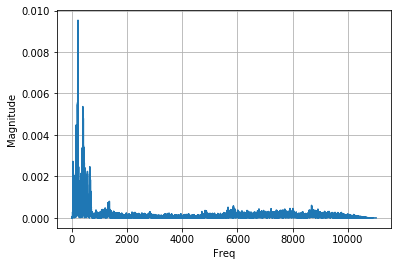

In [168]:
fft_plot_final = fft_plot(x_new, sample_rate)
fft_plot_final

In [169]:
fft_array_final = fft_array(samples, sample_rate) - 50
fft_array_final

array([-49.23783 -0.j        , -51.16527 +0.88283086j,
       -49.64174 -1.5857176j , ..., -50.878567-0.8092307j ,
       -49.64174 +1.5857176j , -51.16527 -0.88283086j], dtype=complex64)

In [170]:
fft_array_final_transformed = np.log(result - 50)
fft_array_final_transformed

array([3.89866696+3.14159265j, 3.9389028 +3.12578796j,
       3.89756162-3.11462982j, ..., 3.92930536-3.1348539j ,
       3.89756162+3.11462982j, 3.9389028 -3.12578796j])

In [171]:
inverse_data_final = np.array(scipy.fft.irfft(fft_array_final_transformed))

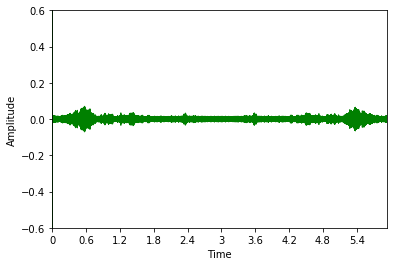

In [172]:
plt.figure()
librosa.display.waveplot(y = inverse_data_final, sr = (sample_rate*2), color = "green")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-.6, .6)
plt.show()

In [173]:
from scipy.io.wavfile import write
write("new_3.wav", (sample_rate*2), inverse_data_final)

In [174]:
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/new_3.wav')

## Our transforamtion implementation gives nearly the same result as the implementation with scipy.fft()  (new_3.wav)